## **IMPORTING NECESSARY LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings

warnings.filterwarnings("ignore")
sns.set_style("white")

In [2]:
df = pd.read_csv("/content/netflix_titles.csv.zip")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Text(0.5, 0, '')

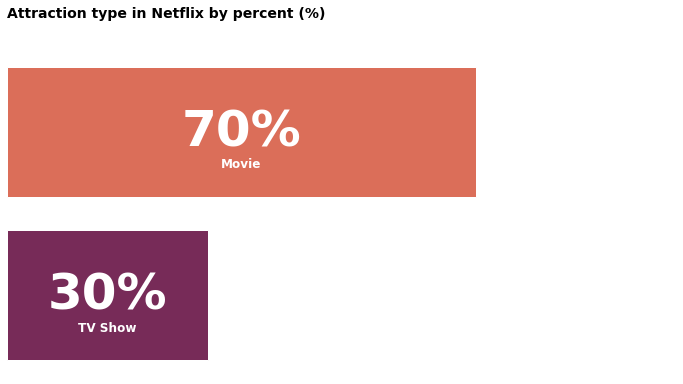

In [4]:
types_df = df.groupby(["type"]).size().reset_index(name="counts")
types_df["percent"] = round(types_df["counts"] / sum(types_df["counts"]), 2) * 100
plt.figure(figsize=(12, 6))
g = sns.barplot(x="percent", y="type", palette="rocket_r", data=types_df, orient="h")

g.text(
    0,
    -0.7,
    "Attraction type in Netflix by percent (%)",
    fontsize=14,
    fontweight="bold",
    color="black",
)

col = "percent"
for i in range(2):
    g.annotate(
        f"{int(types_df[col][i])}%",
        xy=(types_df[col][i] / 2, i),
        ha="center",
        va="center",
        fontsize=50,
        fontweight="bold",
        color="white",
    )
    g.annotate(
        "Movie" if i == 0 else "TV Show",
        xy=(types_df[col][i] / 2, i + 0.2),
        ha="center",
        va="center",
        fontsize=12,
        fontweight="bold",
        color="white",
    )

for i in ["top", "left", "right", "bottom"]:
    g.spines[i].set_visible(False)

g.set_xlim(0, 100)
g.set(xticklabels=[], yticklabels=[])
plt.ylabel("")
plt.xlabel("")

Text(0, 0.5, '')

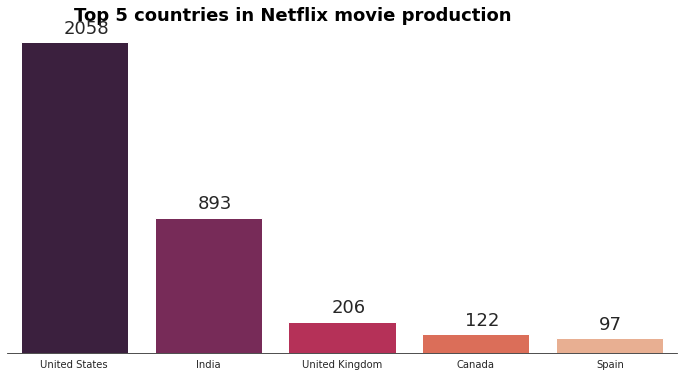

In [11]:
#movies and TV shows production
movies_df = df[df["type"] == "Movie"]
top5countries_movies = (
    movies_df.groupby(["country"]).size().sort_values(ascending=False)[0:5]
)

plt.figure(figsize=(12, 6))
g = sns.barplot(x=top5countries_movies.index, y=top5countries_movies, palette="rocket")
g.text(
    0,
    2200,
    "Top 5 countries in Netflix movie production",
    fontsize=18,
    fontweight="bold",
    color="black",
)

for i in ["top", "left", "right"]:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(
        i.get_x() + i.get_width() / 2.5,
        i.get_height() + 60,
        round(i.get_height()),
        fontsize="18",
    )

g.set(yticklabels=[])
plt.xlabel("")
plt.ylabel("")


Text(0, 0.5, '')

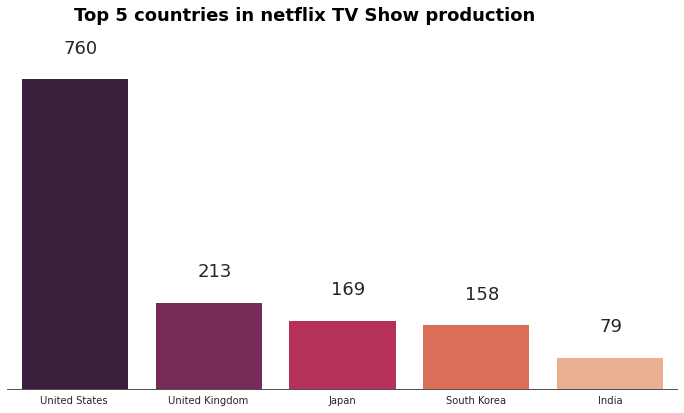

In [12]:
#Looking at the top 5 countries again, but for TV Shows, in the chart below we can notice USA still leads the productions!
tvshows_df = df[df["type"] == "TV Show"]
top5countries_tvshows = (
    tvshows_df.groupby(["country"]).size().sort_values(ascending=False)[0:5]
)

plt.figure(figsize=(12, 6))
g = sns.barplot(
    x=top5countries_tvshows.index, y=top5countries_tvshows, palette="rocket"
)
g.text(
    0,
    900,
    "Top 5 countries in netflix TV Show production",
    fontsize=18,
    fontweight="bold",
    color="black",
)

for i in ["top", "left", "right"]:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(
        i.get_x() + i.get_width() / 2.5,
        i.get_height() + 60,
        round(i.get_height()),
        fontsize="18",
    )

g.set(yticklabels=[])
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

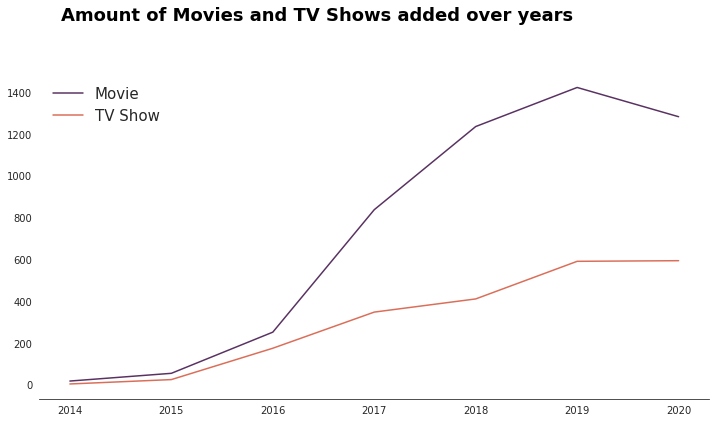

In [13]:
#The time Netflix invests more in movies or TV shows
df["date_added"] = pd.to_datetime(df["date_added"])
df["year_added"] = df["date_added"].dt.year
index = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

ts_df = df[df["year_added"] > 2013]
ts_df = (
    ts_df[ts_df["year_added"] < 2021]
    .groupby("type")["year_added"]
    .value_counts()
    .unstack()
    .T
)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.text(
    0.15,
    1,
    "Amount of Movies and TV Shows added over years",
    fontsize=18,
    fontweight="bold",
    color="black",
)

g1 = sns.lineplot(x=ts_df.index, y=ts_df["Movie"], color="#593262", label="Movie")
g2 = sns.lineplot(x=ts_df.index, y=ts_df["TV Show"], color="#db6e59", label="TV Show")


for i in ["top", "left", "right"]:
    ax.spines[i].set_visible(False)

ax.legend(loc="upper left", frameon=False, prop={"size": 15})
plt.xlabel("")
plt.ylabel("")

(0.0, 1.0)

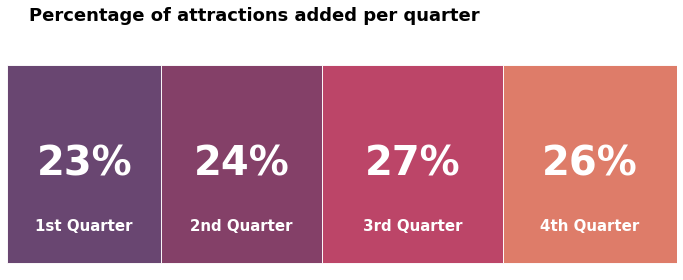

In [14]:
def quarter_expression(i):
    if i == 1:
        return "1st Quarter"
    elif i == 2:
        return "2nd Quarter"
    elif i == 3:
        return "3rd Quarter"
    else:
        return "4th Quarter"


df["quarter_added"] = df["date_added"].dt.quarter
qrt_df = df["quarter_added"].value_counts()
prct_qrt = pd.DataFrame(round(qrt_df / sum(qrt_df), 2)).T

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.barh(prct_qrt.index, prct_qrt[1.0], color="#593262", alpha=0.9)
ax.barh(prct_qrt.index, prct_qrt[2.0], color="#772b58", alpha=0.9, left=prct_qrt[1.0])
ax.barh(
    prct_qrt.index,
    prct_qrt[3.0],
    color="#b53158",
    alpha=0.9,
    left=prct_qrt[1.0] + prct_qrt[2.0],
)
ax.barh(
    prct_qrt.index,
    prct_qrt[4.0],
    color="#db6e59",
    alpha=0.9,
    left=prct_qrt[1.0] + prct_qrt[2.0] + prct_qrt[3.0],
)

fig.text(
    0.15,
    1,
    "Percentage of attractions added per quarter",
    fontsize=18,
    fontweight="bold",
    color="black",
)

sum_list = []
for i in range(1, 5):
    ax.annotate(
        f"{int((prct_qrt[i][prct_qrt.index])*100)}%",
        xy=(sum(sum_list) + prct_qrt[i][prct_qrt.index] / 2, prct_qrt.index),
        ha="center",
        va="center",
        fontsize=40,
        fontweight="bold",
        color="white",
    )
    ax.annotate(
        quarter_expression(i),
        xy=(sum(sum_list) + prct_qrt[i][prct_qrt.index] / 2, -0.25),
        ha="center",
        va="center",
        fontsize=15,
        fontweight="bold",
        color="white",
    )

    sum_list.append(prct_qrt[i][prct_qrt.index])

for i in ["top", "left", "right", "bottom"]:
    ax.spines[i].set_visible(False)

ax.set(yticklabels=[], xticklabels=[])
ax.set_xlim(0, 1)

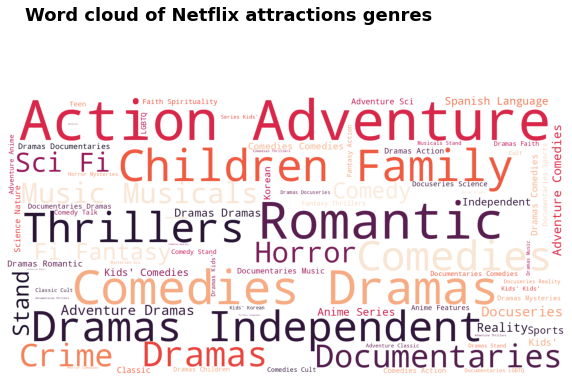

In [15]:
#genre
df["genre"] = df["listed_in"].apply(
    lambda x: x.replace(" TV", "")
    .replace("TV ", "")
    .replace(" ,", ",")
    .replace(", ", ",")
    .split(",")
)

stopwords = set(STOPWORDS)
stopwords.update(["Shows", "Movies", "British", "International"])

all_summary = " ".join(" ".join(s) for s in df["genre"])
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    colormap="rocket",
    width=1600,
    height=800,
).generate(all_summary)

fig, ax = plt.subplots(figsize=(10, 6))

fig.text(
    0.15,
    1,
    "Word cloud of Netflix attractions genres",
    fontsize=18,
    fontweight="bold",
    color="black",
)

ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()

plt.imshow(wordcloud)